<h1 style='color:#2c71e8'>Importing Data</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import time

In [2]:
dataset = pd.read_csv('appdata10.csv')

<h1 style='color:#2c71e8'>Data Cleaning & Exploratory Data Analysis(EDA)</h1>

In [3]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# data cleaning
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)

In [6]:
# create a copy of dataset
dataset2 = dataset.copy()

# drop some columns 
dataset2 = dataset2.drop(columns=['user','screen_list','enrolled_date','enrolled','first_open'])

# see five rows after dropping some columns
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


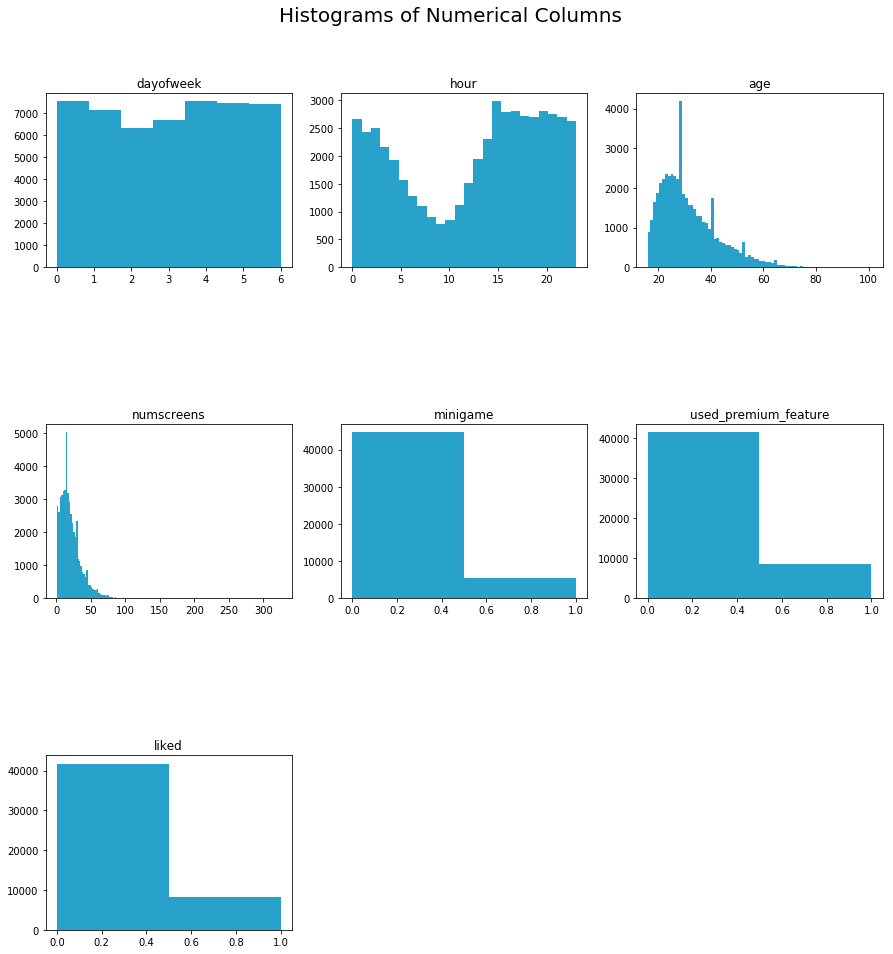

In [7]:
# plotting histogram

plt.figure(figsize=(15,15))
plt.suptitle('Histograms of Numerical Columns',fontsize=20)

# create a new subfigure for each feature
for i in range(1,dataset2.shape[1]+1):
    plt.subplot(3,3,i)
    plt.subplots_adjust()
    f = plt.gca() #new figure with default axis
  
  # setting subtitle of Figure
    f.set_title(dataset2.columns.values[i-1])
  
    # calculate the total unique values
    vals = np.size(dataset2.iloc[:, i -1].unique())

    # Create new plot
    plt.hist(dataset2.iloc[:, i - 1], bins = vals, color = "#29A2CB")
    plt.subplots_adjust(hspace=0.9, top = 0.9)


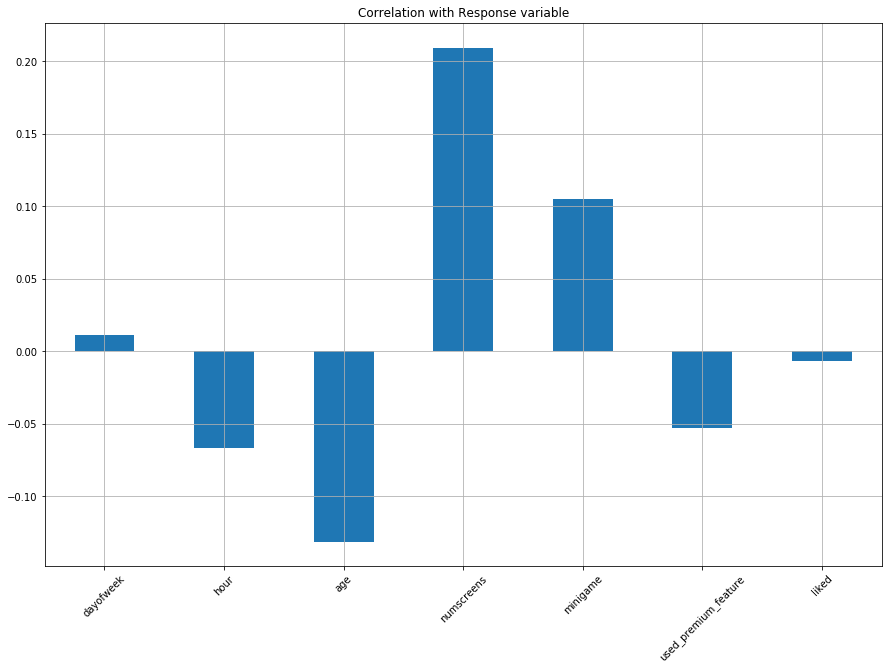

In [8]:
# correlation with response

dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(15,10),
                                            title='Correlation with Response variable',
                                            fontsize=10,
                                             rot=45,
                                             grid=True
                                            )
plt.show()

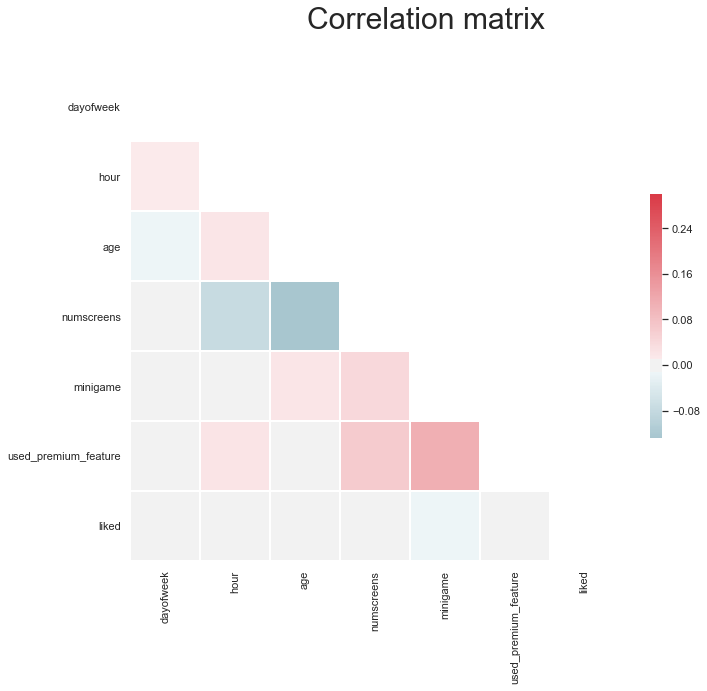

In [9]:
# Correlation Matrix

sns.set(style="white")

#compute the correlation matrix
corr = dataset2.corr()

# generate a mask for upper triangle
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f,ax = plt.subplots(figsize=(11,9))
f.suptitle("Correlation matrix",fontsize=30)

# generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

<h1 style='color:#2c71e8'>Feature Engineering</h1>

In [10]:
# check the dtypes of all columns in a dataframe

dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [11]:
# change the dtype of some columns 
dataset['first_open'] = [parser.parse(row_data) for row_data in dataset['first_open']]
dataset['enrolled_date'] = [parser.parse(row_data) if(isinstance(row_data,str)) else row_data for row_data in dataset['enrolled_date']]

# again check dtypes 
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [12]:
# create time difference column
dataset['difference'] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

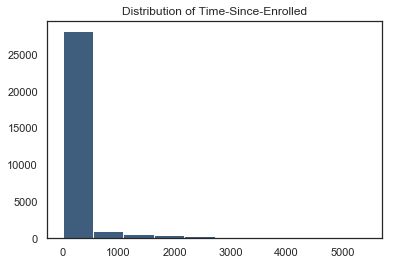

In [13]:
# plot the histogram
plt.hist(dataset.difference.dropna(),color='#3F5D7D')
plt.title('Distribution of Time-Since-Enrolled')
plt.show()

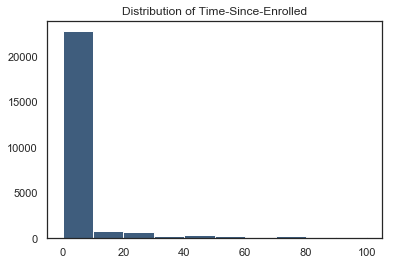

In [14]:
# plot the histogram
plt.hist(dataset.difference.dropna(),color='#3F5D7D',range=[0,100])
plt.title('Distribution of Time-Since-Enrolled')
plt.show()

In [15]:
dataset.loc[dataset.difference>48,'enrolled'] = 0

# drop some columns

dataset = dataset.drop(columns=['difference','enrolled_date','first_open'])

In [16]:
# check the five rows of dataframe after dropping the columns

dataset.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [19]:
# formatting the screen_list field

top_screens = pd.read_csv('top_screens.csv').top_screens.values
top_screens[:5]

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone'], dtype=object)

In [30]:
# create list aff actual screen list by user on the dataset
dataset['screen_list'] = dataset.screen_list.astype(str)+','


In [33]:
# loop over the dataset and try to math the top_screen list with the screen_list of each user (record)
for sc in top_screens:
    # for each word on the top_screen we create a column inside the dataset
    # If the word is containt in the screen_list we mark as True (1) or False (0)
    dataset[sc] =  dataset.screen_list.str.contains(sc).astype('int')
    # remove from the list screen_list the actual word. We already check 
    dataset["screen_list"] = dataset.screen_list.str.replace(sc+',',"")

In [35]:
# create a new column of all not top_screen (count)
dataset["Other"] = dataset.screen_list.str.count(",")

# Drop columns we dont need anymore
dataset = dataset.drop(columns = ["screen_list"])

In [37]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
1,333588,6,1,24,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,3
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,9
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,13


In [43]:
# Saving Screen Funnels - We have cases that have similar naming convension. 
# So to avoid the correlation we find them, sumarize and finally get rid of all the columns 
savings_screens = ["Saving1",
                  "Saving2",
                  "Saving2Amount",
                  "Saving4",
                  "Saving5",
                  "Saving6",
                  "Saving7",
                  "Saving8",
                  "Saving9",
                  "Saving10"]

# sum all the related saving screen
dataset["SavingsCount"] = dataset[savings_screens].sum(axis = 1)
dataset = dataset.drop(columns = savings_screens)


In [44]:
# Credit Funnels - The same as Saving Screen
cm_screens = ["Credit1",
              "Credit2",
              "Credit3",
             "Credit3Container",
             "Credit3Dashboard"]

# sum all the related saving screen
dataset["CMCount"] = dataset[cm_screens].sum(axis = 1)
dataset = dataset.drop(columns = cm_screens)

In [45]:

# CC Funnels - The same as Saving Screen
cc_screens = ["CC1",
              "CC1Category",
             "CC3"]

# sum all the related saving screen
dataset["CCCount"] = dataset[cc_screens].sum(axis = 1)
dataset = dataset.drop(columns = cc_screens)

In [46]:

# Loan Funnels - The same as Saving Screen
loan_screens = ["Loan",
              "Loan2",
              "Loan3",
              "Loan4"]

# sum all the related saving screen
dataset["LoansCount"] = dataset[loan_screens].sum(axis = 1)
dataset = dataset.drop(columns = loan_screens)

In [48]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,10,0,0,0,0
1,333588,6,1,24,13,0,0,0,0,0,...,0,0,0,0,0,8,0,0,0,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,3,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,9,0,0,0,0
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,13,0,0,0,0


In [49]:
# export data to a new CSV
# dataset.to_csv(new_appdata10.csv,index = False)

<h1 style='color:#2c71e8'>Data Preprocessing</h1>

In [50]:
X = dataset.drop(columns='enrolled')
y = dataset.enrolled

In [51]:
# create a training and testing set (80/20)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [52]:
# remove the user identifier from the training and testing test
train_identifier = X_train['user']
X_train = X_train.drop(columns='user')
test_identifier = X_test['user']
X_test = X_test.drop(columns='user')

# show dataframe after dropping user column
X_train.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
4166,0,14,24,15,0,0,0,0,0,0,...,0,0,0,0,0,14,0,0,0,0
29644,1,16,22,3,0,1,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
27558,1,0,59,4,0,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,0
11222,1,22,19,43,0,0,0,0,0,0,...,0,0,0,0,0,18,0,0,0,0
5671,4,23,26,6,0,1,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0


In [58]:
# scaling the data

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

# ScandarScaler return a numpy array without name columns & Index so we need to recreate the dataframe
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

# add column names and Index to the new X_train & X_test
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values

X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values

# reassign X_train2 to X_train and X_test2 to X_test
X_train = X_train2
X_test = X_test2

# check first five rows of X_train
X_train.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
4166,-1.488205,0.191736,-0.715297,-0.386484,-0.347328,-0.456933,-0.444971,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.310959,0.0,-0.089661,0.0,-0.339915
29644,-0.996229,0.460664,-0.899979,-1.148545,-0.347328,2.188504,-0.444971,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.691040,0.0,-0.089661,0.0,-0.339915
27558,-0.996229,-1.690763,2.516650,-1.085040,-0.347328,-0.456933,-0.444971,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.599404,0.0,-0.089661,0.0,-0.339915
11222,-0.996229,1.267450,-1.177003,1.391659,-0.347328,-0.456933,-0.444971,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.402595,0.0,-0.089661,0.0,-0.339915
5671,0.479702,1.401914,-0.530614,-0.958030,-0.347328,2.188504,-0.444971,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.418131,0.0,-0.089661,0.0,-0.339915


<h1 style='color:#2c71e8'>Model Building & Traning</h1>

In [59]:
from sklearn.linear_model import LogisticRegression

In [65]:
classifier = LogisticRegression(random_state=0,penalty='l2')

# model train
classifier.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<h1 style='color:#2c71e8'>Evaluating The Model</h1>


In [66]:
# import the libraries for evaluation result
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [67]:
# getting predictions
y_pred = classifier.predict(X_test)

In [69]:
# check accuracy of model
accuracy_score(y_test,y_pred)

0.6969

In [70]:
# The precision is the ratio tp / (tp + fp) where tp is the number of 
# true positives and fp the number of false positives. 
precision_score(y_test,y_pred)

0.6957207651350819

In [72]:
# The recall is the ratio tp / (tp + fn) where tp is the number of 
# true positives and fn the number of false negatives.
# How many positive we have en essence 
recall_score(y_test,y_pred)

0.7033492822966507

In [73]:
# f1 score
f1_score(y_test,y_pred)

0.6995142262317835

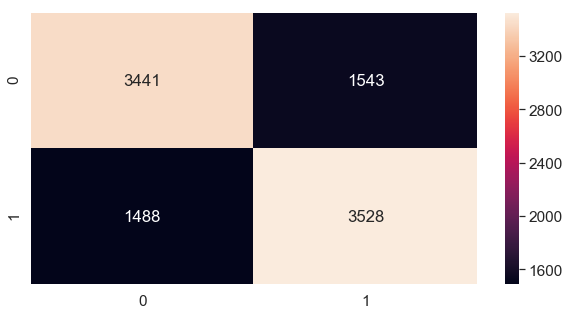

In [76]:
# calculate the confusion matrix in order to evaluate the results
cm = confusion_matrix(y_test,y_pred)

# heatmap to see positive and negative match
plt.figure(figsize = (10,5))
sns.set(font_scale=1.4)
sns.heatmap(cm,annot=True,fmt='g')

In [77]:
# how accuracy our model learn. We use the cross val score to see if our model

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
accuracies

array([0.6985 , 0.69075, 0.6835 , 0.69425, 0.6925 , 0.68725, 0.6865 ,
       0.68925, 0.689  , 0.71   ])

In [80]:
print(f"Logistic Regression Accuracy is {accuracies.mean():.2f}%")

Logistic Regression Accuracy is 0.69%


In [82]:
# formatting the final Results
final_results = pd.concat([y_test,test_identifier],axis=1).dropna()
final_results['predicted_results'] = y_pred

In [83]:
# show the result of predicting if a user will enroll vs enrolled
final_results[["user","enrolled","predicted_results"]].reset_index(drop=True).head()

,user,enrolled,predicted_results
0,354413,1,0
1,230883,1,1
2,41909,0,0
3,305601,0,1
4,295675,0,0
